{'m00': 11603.0, 'm10': 5058172.0, 'm01': 2915827.1666666665, 'm20': 2215675664.1666665, 'm11': 1271115490.0, 'm02': 743541210.6666666, 'm30': 975164833515.0, 'm21': 556797697821.55, 'm12': 324137001515.0833, 'm03': 192277438231.65002, 'mu20': 10633521.480809212, 'mu11': -198.29377460479736, 'mu02': 10795535.766092539, 'mu30': -293331.5476074219, 'mu21': -137918.4601597786, 'mu12': 297536.8462486267, 'mu03': 139728.75610351562, 'nu20': 0.0789835279162789, 'nu11': -1.4728838334871596e-06, 'nu02': 0.08018693544666344, 'nu30': -2.0227073051767514e-05, 'nu21': -9.510353699059625e-06, 'nu12': 2.0517055099433212e-05, 'nu03': 9.635185100925385e-06}
{'m00': 11773.0, 'm10': 810164.5, 'm01': 759007.0, 'm20': 66697334.33333333, 'm11': 52231397.58333333, 'm02': 60048930.166666664, 'm30': 6096373554.25, 'm21': 4300090854.583333, 'm12': 4132168000.4166665, 'm03': 5304508453.5, 'mu20': 10945485.436684214, 'mu11': -24.029806911945343, 'mu02': 11115639.922124058, 'mu30': 127907.97165775299, 'mu21': 107

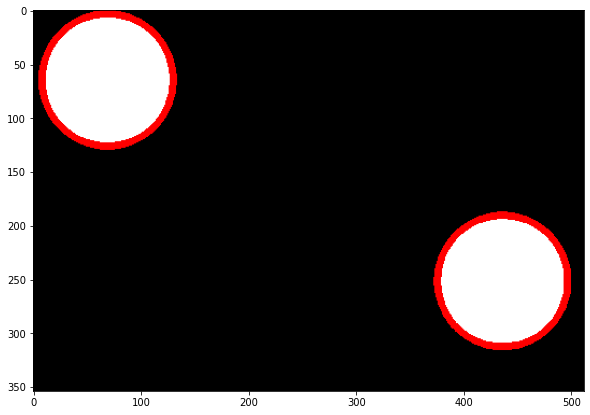

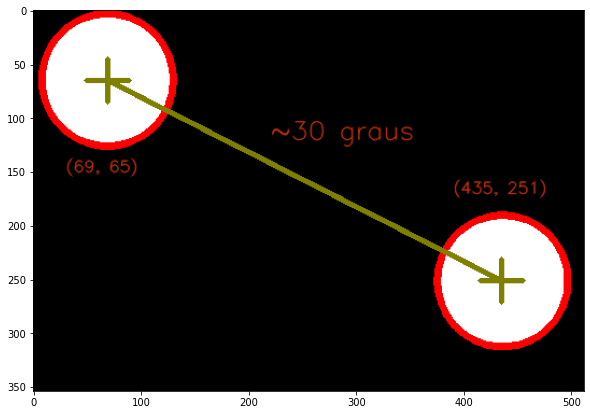

In [1]:
%matplotlib inline
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('Circulos_NAC.png')

img2 = cv2.imread('hsv_colorspace.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv = np.array([85, 50, 100])
image_upper_hsv = np.array([87, 255, 255])

lower_red = np.array([175,150,100])
upper_red = np.array([180,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

lower_red = np.array([0,150,100])
upper_red = np.array([5,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

maskRed = mask0+mask1

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

maskFinal = maskRed+mask_hsv
contornos, _ = cv2.findContours(maskFinal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(maskFinal, cv2.COLOR_GRAY2RGB)

contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(10,7))
plt.imshow(contornos_img, cmap='gray');

size = 20
color = (128,128,0)

cnt = contornos[0]
cnt2 = contornos[1]


M = cv2.moments(cnt)
print( M )

M2 = cv2.moments(cnt2)
print( M2 )

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = int(M2['m10']/M['m00'])
cy2 = int(M2['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)
print("centro de massa na possição: ",cx2, cy2)

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,3)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,3)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,3)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,3)

cv2.line(contornos_img,(cx,cy),(cx2,cy2),color,3)

y=cy
x=cx
graus = math.degrees(math.atan2(y,x))

font = cv2.FONT_HERSHEY_SIMPLEX
print(str(round(graus)) + chr(176))
textGraus = '~' + str(round(graus)) + ' graus'
origemGraus = (220,120)

cv2.putText(contornos_img, str(textGraus), origemGraus, font,0.8,(200,50,0),1,cv2.LINE_AA)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cx , cy
origem = (390,170)

font = cv2.FONT_HERSHEY_SIMPLEX
text2 = cx2 , cy2
origem2 = (30,150)


cv2.putText(contornos_img, str(text), origem, font,0.5,(200,50,0),1,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font,0.5,(200,50,0),1,cv2.LINE_AA)

plt.figure(figsize=(10,7))
plt.imshow(contornos_img);